In [1]:
# pip install --upgrade tifffile

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, color, exposure, filters, morphology

# Q1

In [3]:
hw1_img = io.imread("./HW_Image1.tif")
print(hw1_img.shape)

(528, 485)


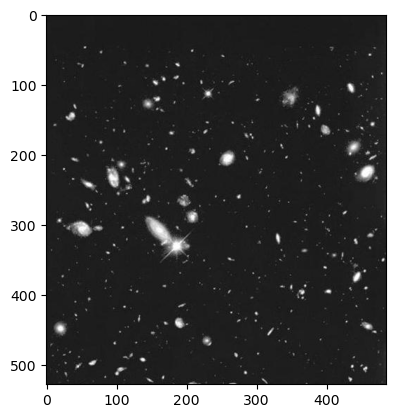

In [4]:
plt.imshow(hw1_img, cmap="gray")

### Gaussian Filter

(528, 485)


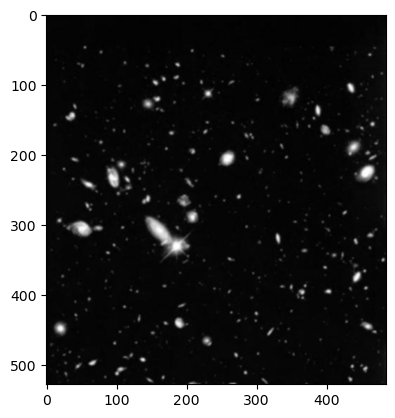

In [5]:
hw1_img_gaussian = filters.gaussian(hw1_img)
print(hw1_img_gaussian.shape)
plt.imshow(hw1_img_gaussian, cmap="gray")

### Filter

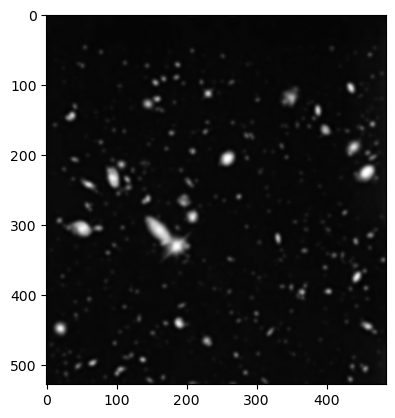

In [6]:
hw1_img_bw = filters.butterworth(hw1_img, high_pass=False, cutoff_frequency_ratio=0.1)
plt.imshow(hw1_img_bw, cmap="gray")

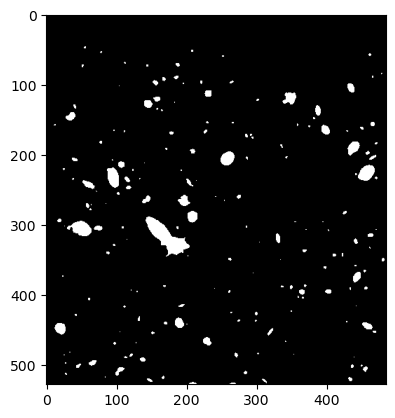

In [7]:
thresh = filters.threshold_otsu(hw1_img_gaussian)
hw1_img_thresh = hw1_img_gaussian > thresh
plt.imshow(hw1_img_thresh, cmap="gray")

# Q2

In [8]:
hw2_img = io.imread("./HW_Image2.tif")
print(hw2_img.shape)

(800, 500)


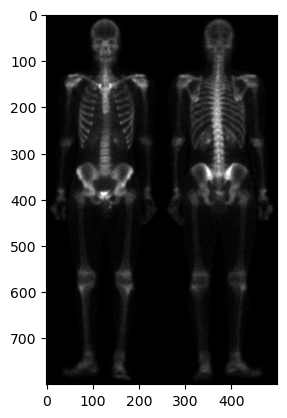

In [9]:
plt.imshow(hw2_img, cmap="gray")

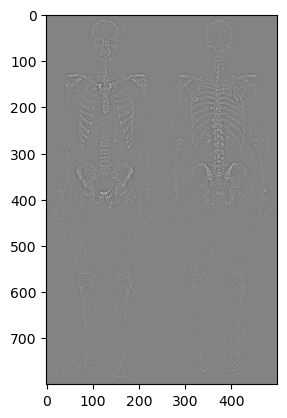

In [10]:
hw2_img_laplacian = filters.laplace(hw2_img)
plt.imshow(hw2_img_laplacian, cmap="gray")

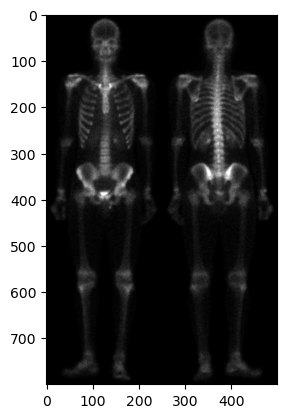

In [11]:
hw2_img_sharpened = hw2_img + hw2_img_laplacian
plt.imshow(hw2_img_sharpened, cmap="gray")

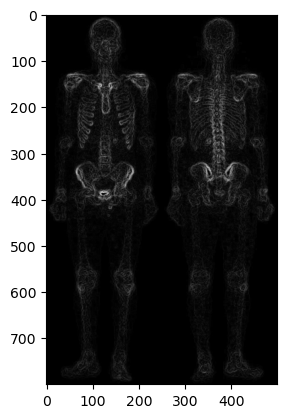

In [12]:
hw2_img_sobel = filters.sobel(hw2_img)
plt.imshow(hw2_img_sobel, cmap="gray")

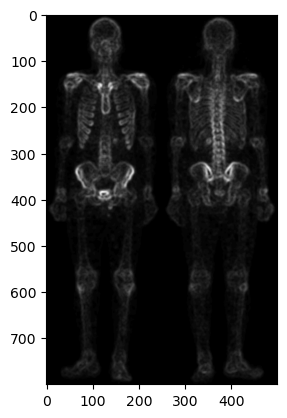

In [13]:
hw2_img_smoothed = filters.rank.mean(util.img_as_ubyte(hw2_img_sobel), footprint=morphology.square(5))
plt.imshow(hw2_img_smoothed, cmap="gray")

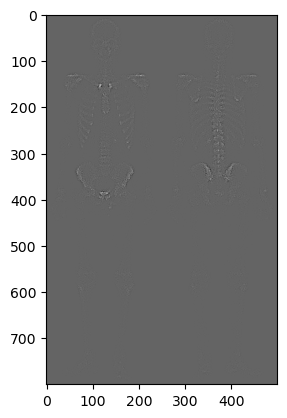

In [14]:
hw2_img_mask = hw2_img_laplacian * hw2_img_smoothed
plt.imshow(hw2_img_mask, cmap="gray")

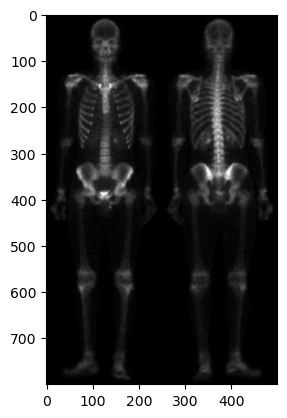

In [15]:
hw2_img_sharpened2 = hw2_img + hw2_img_mask
plt.imshow(hw2_img_sharpened2, cmap="gray")

In [16]:
# Had to rescale intensity because I had negative values
hw2_img_sharp_rescaled = exposure.rescale_intensity(hw2_img_sharpened2, (0, 255))

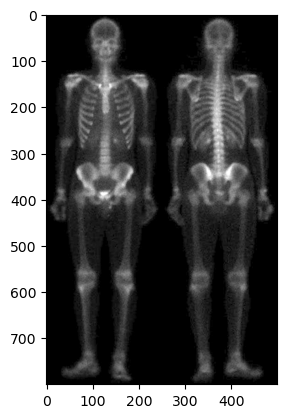

In [17]:
hw2_img_power = exposure.adjust_gamma(hw2_img_sharp_rescaled, gamma=0.6)
plt.imshow(hw2_img_power, cmap="gray")

# Q3

In [18]:
hw3_img = io.imread("./HW_Image3.tif")
hw3_img.shape

(785, 732)

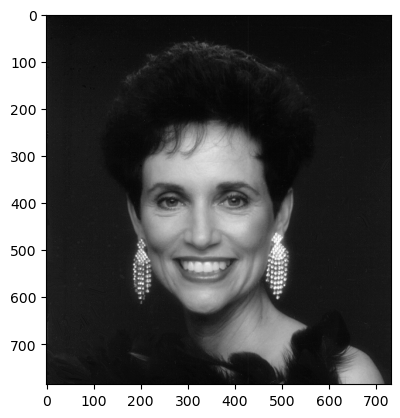

In [20]:
plt.imshow(hw3_img, cmap="gray")